In [ ]:
import pandas as pd
df = pd.read_csv("/content/cars.csv")

In [ ]:
from datetime import date
df['Car_age']=date.today().year-df['Year']

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
df.Brand=lbl.fit_transform(df.Brand)
df.Model=lbl.fit_transform(df.Model)
df["Fuel_Type"]=lbl.fit_transform(df["Fuel_Type"])
df.Transmission=lbl.fit_transform(df.Transmission)
df["Owner_Type"]=lbl.fit_transform(df["Owner_Type"])
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_age
0,1,9,15,2018,50000,1,1,0,15,1498,108,5,800000,6
1,2,3,14,2019,40000,1,0,1,17,1597,140,5,1000000,5
2,3,2,30,2017,20000,1,0,0,10,4951,395,4,2500000,7
3,4,6,42,2020,30000,0,1,2,23,1248,74,5,600000,4
4,5,4,41,2016,60000,0,0,1,18,1999,194,5,850000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,7,11,2019,22000,0,0,0,16,1950,191,5,2900000,5
96,97,9,29,2017,38000,0,1,1,13,2755,171,7,1400000,7
97,98,2,18,2018,26000,1,1,2,18,1497,121,5,750000,6
98,99,4,50,2019,24000,1,0,1,17,1497,113,5,850000,5


In [ ]:
x=df.drop(['Price'],axis=1)
x

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Car_age
0,1,9,15,2018,50000,1,1,0,15,1498,108,5,6
1,2,3,14,2019,40000,1,0,1,17,1597,140,5,5
2,3,2,30,2017,20000,1,0,0,10,4951,395,4,7
3,4,6,42,2020,30000,0,1,2,23,1248,74,5,4
4,5,4,41,2016,60000,0,0,1,18,1999,194,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,7,11,2019,22000,0,0,0,16,1950,191,5,5
96,97,9,29,2017,38000,0,1,1,13,2755,171,7,7
97,98,2,18,2018,26000,1,1,2,18,1497,121,5,6
98,99,4,50,2019,24000,1,0,1,17,1497,113,5,5


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
y=df['Price']
y

,Price
0,800000
1,1000000
2,2500000
3,600000
4,850000
...,...
95,2900000
96,1400000
97,750000
98,850000


In [ ]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
x=scaler.fit_transform(x)

In [ ]:
x

array([[-1.71481604,  1.19759354, -0.79589113, ..., -0.65458965,
        -0.30814935,  0.33468073],
       [-1.68017329, -0.61237151, -0.85369005, ..., -0.23673869,
        -0.30814935, -0.52347499],
       [-1.64553055, -0.91403235,  0.07109267, ...,  3.09301119,
        -1.64792914,  1.19283646],
       ...,
       [ 1.64553055, -0.91403235, -0.62249437, ..., -0.4848377 ,
        -0.30814935,  0.33468073],
       [ 1.68017329, -0.31071067,  1.22707108, ..., -0.58930044,
        -0.30814935, -0.52347499],
       [ 1.71481604,  0.8959327 , -1.2582825 , ..., -0.95492003,
        -0.30814935, -1.38163072]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(80, 13)

In [ ]:
y_train.shape

(80,)

In [ ]:
X_test.shape

(20, 13)

In [ ]:
y_test.shape

(20,)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 214186032536.29962
R-squared: 0.7381108607491599


In [ ]:
import numpy as np
df['Kilometers_Driven_log'] = np.log(df['Kilometers_Driven'])
df['Price_log'] = np.log(df['Price'])

In [ ]:
df['Kilometers_Driven_log'] = np.log(df['Kilometers_Driven'].replace(0, np.nan))
df['Price_log'] = np.log(df['Price'].replace(0, np.nan))

In [ ]:
# prompt: Perform Feature Engineering towards building new feature which is more impactful.
# Build machine learning model/s to predict the price of the car based on other given
# features like Brand, Model, Year, Fuel Type etc

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Feature Engineering:

# 1. Interaction terms:
df['Brand_Model_Interaction'] = df['Brand'] * df['Model']
df['Age_Kilometers_Interaction'] = df['Car_age'] * df['Kilometers_Driven_log']

# 2. Polynomial features:
# You can consider creating polynomial features for numerical variables like 'Kilometers_Driven_log' or 'Engine'
# using PolynomialFeatures from sklearn.preprocessing if you suspect non-linear relationships.

# 3. Categorical Feature Encoding: (Already done using LabelEncoder)

# 4. Feature Scaling: (Already done using StandardScaler)

# Prepare data for modeling:
X = df.drop(['Price', 'Price_log'], axis=1)
y = df['Price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and evaluate different machine learning models:

# 1. Linear Regression:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression:")
print(f"Mean Squared Error: {mse_lr}")
print(f"R-squared: {r2_lr}")

# 2. Decision Tree Regressor:
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("\nDecision Tree Regressor:")
print(f"Mean Squared Error: {mse_dt}")
print(f"R-squared: {r2_dt}")

# 3. Random Forest Regressor:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Regressor:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

# Compare the performance of different models and choose the best one based on your evaluation metrics.
# You can further fine-tune the hyperparameters of the models using techniques like GridSearchCV to improve performance.


Linear Regression:
Mean Squared Error: 187353440551.8432
R-squared: 0.7709195567012983

Decision Tree Regressor:
Mean Squared Error: 198375000000.0
R-squared: 0.7574432964480039

Random Forest Regressor:
Mean Squared Error: 135053200000.0
R-squared: 0.8348680075808522


In [ ]:
correlation_matrix=df.corr()
correlation_matrix

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_age,Brand_Model_Interaction,Kilometers_Driven_log,Age_Kilometers_Interaction,Price_log
Car_ID,1.000000,0.015205,0.053171,0.059904,-0.227442,0.088063,0.087118,0.049568,0.026140,-0.027965,0.027637,-0.021582,0.037105,-0.059904,0.060786,-0.183248,-0.079168,-0.002979
Brand,0.015205,1.000000,0.194702,0.110875,0.082947,0.063037,0.187123,-0.079183,0.086441,-0.166709,-0.335425,0.114417,-0.354543,-0.110875,0.745627,0.043894,-0.089026,-0.329695
Model,0.053171,0.194702,1.000000,0.090754,0.011237,-0.059048,0.263721,0.088050,0.130721,-0.074587,-0.153203,-0.063274,-0.292434,-0.090754,0.653502,0.006925,-0.080529,-0.288410
Year,0.059904,0.110875,0.090754,1.000000,-0.741176,0.252843,0.211993,-0.036276,0.213177,-0.355122,-0.249446,-0.252598,-0.232687,-1.000000,0.135353,-0.790178,-0.996615,-0.307106
Kilometers_Driven,-0.227442,0.082947,0.011237,-0.741176,1.000000,-0.323762,0.030157,-0.000560,-0.104437,0.112340,-0.026732,0.396443,-0.051104,0.741176,0.067256,0.972853,0.793016,0.027309
Fuel_Type,0.088063,0.063037,-0.059048,0.252843,-0.323762,1.000000,0.066306,0.323325,-0.060292,-0.258043,-0.008562,-0.347549,-0.180964,-0.252843,0.024436,-0.306794,-0.268928,-0.249695
Transmission,0.087118,0.187123,0.263721,0.211993,0.030157,0.066306,1.000000,0.097708,0.331015,-0.421374,-0.574349,0.111225,-0.676484,-0.211993,0.315121,-0.003408,-0.186321,-0.693121
Owner_Type,0.049568,-0.079183,0.088050,-0.036276,-0.000560,0.323325,0.097708,1.000000,0.072823,-0.248205,-0.237857,-0.075318,-0.301488,0.036276,-0.071335,0.017365,0.034199,-0.331157
Mileage,0.026140,0.086441,0.130721,0.213177,-0.104437,-0.060292,0.331015,0.072823,1.000000,-0.680949,-0.648894,-0.194581,-0.595252,-0.213177,0.141117,-0.085221,-0.202613,-0.639202
Engine,-0.027965,-0.166709,-0.074587,-0.355122,0.112340,-0.258043,-0.421374,-0.248205,-0.680949,1.000000,0.805709,0.179179,0.714465,0.355122,-0.213170,0.112797,0.330552,0.735843


In [ ]:
target_correlation = correlation_matrix['Price'].abs().sort_values(ascending=False)
selected_features =target_correlation[target_correlation>0.5].index.tolist()
print(f"Selected features high;y with price: {selected_features}")

Selected features high;y with price: ['Price', 'Price_log', 'Power', 'Engine', 'Transmission', 'Mileage']


In [ ]:
# prompt: build model use all feature and another one use only import feature then compare
# new feature, correlation, feature selection,

# Prepare data for modeling (using all features):
X_all = df.drop(['Price', 'Price_log'], axis=1)
y_all = df['Price']

# Split data into train and test sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler_all = StandardScaler()
X_train_all = scaler_all.fit_transform(X_train_all)
X_test_all = scaler_all.transform(X_test_all)

# Build and evaluate a Random Forest model using all features:
model_rf_all = RandomForestRegressor(random_state=42)
model_rf_all.fit(X_train_all, y_train_all)
y_pred_rf_all = model_rf_all.predict(X_test_all)
mse_rf_all = mean_squared_error(y_test_all, y_pred_rf_all)
r2_rf_all = r2_score(y_test_all, y_pred_rf_all)
print("\nRandom Forest Regressor (All Features):")
print(f"Mean Squared Error: {mse_rf_all}")
print(f"R-squared: {r2_rf_all}")


# Prepare data for modeling (using only important features):
# We already have 'selected_features' from the correlation analysis
X_imp = df[selected_features]
y_imp = df['Price']

# Split data into train and test sets
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(
    X_imp, y_imp, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler_imp = StandardScaler()
X_train_imp = scaler_imp.fit_transform(X_train_imp)
X_test_imp = scaler_imp.transform(X_test_imp)


# Build and evaluate a Random Forest model using important features:
model_rf_imp = RandomForestRegressor(random_state=42)
model_rf_imp.fit(X_train_imp, y_train_imp)
y_pred_rf_imp = model_rf_imp.predict(X_test_imp)
mse_rf_imp = mean_squared_error(y_test_imp, y_pred_rf_imp)
r2_rf_imp = r2_score(y_test_imp, y_pred_rf_imp)
print("\nRandom Forest Regressor (Important Features):")
print(f"Mean Squared Error: {mse_rf_imp}")
print(f"R-squared: {r2_rf_imp}")

# Compare the performance of models with all features and important features:
print("\nComparison:")
print(f"All Features - MSE: {mse_rf_all}, R-squared: {r2_rf_all}")
print(f"Important Features - MSE: {mse_rf_imp}, R-squared: {r2_rf_imp}")


Random Forest Regressor (All Features):
Mean Squared Error: 135053200000.0
R-squared: 0.8348680075808522

Random Forest Regressor (Important Features):
Mean Squared Error: 3143987500.0
R-squared: 0.9961557895702146

Comparison:
All Features - MSE: 135053200000.0, R-squared: 0.8348680075808522
Important Features - MSE: 3143987500.0, R-squared: 0.9961557895702146


In [ ]:
# Create new feature: Age of the car
df['Age'] = 2024 - df['Year']

# New feature: Kilometers driven per year
df['Km_per_Year'] = df['Kilometers_Driven'] / df['Age']

# Drop the redundant 'Year' column
df.drop('Year', axis=1, inplace=True)

# One-Hot Encode categorical columns
categorical_columns = ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Check the updated dataframe
print(df_encoded.head())

   Car_ID  Kilometers_Driven  Mileage  Engine  Power  Seats    Price  Car_age  \
0       1              50000       15    1498    108      5   800000        6   
1       2              40000       17    1597    140      5  1000000        5   
2       3              20000       10    4951    395      4  2500000        7   
3       4              30000       23    1248     74      5   600000        4   
4       5              60000       18    1999    194      5   850000        8   

   Brand_Model_Interaction  Kilometers_Driven_log  ...  Model_52  Model_53  \
0                      135              10.819778  ...     False     False   
1                       42              10.596635  ...     False     False   
2                       60               9.903488  ...     False     False   
3                      252              10.308953  ...     False     False   
4                      164              11.002100  ...     False     False   

   Model_54  Model_55  Model_56  Model_57  F

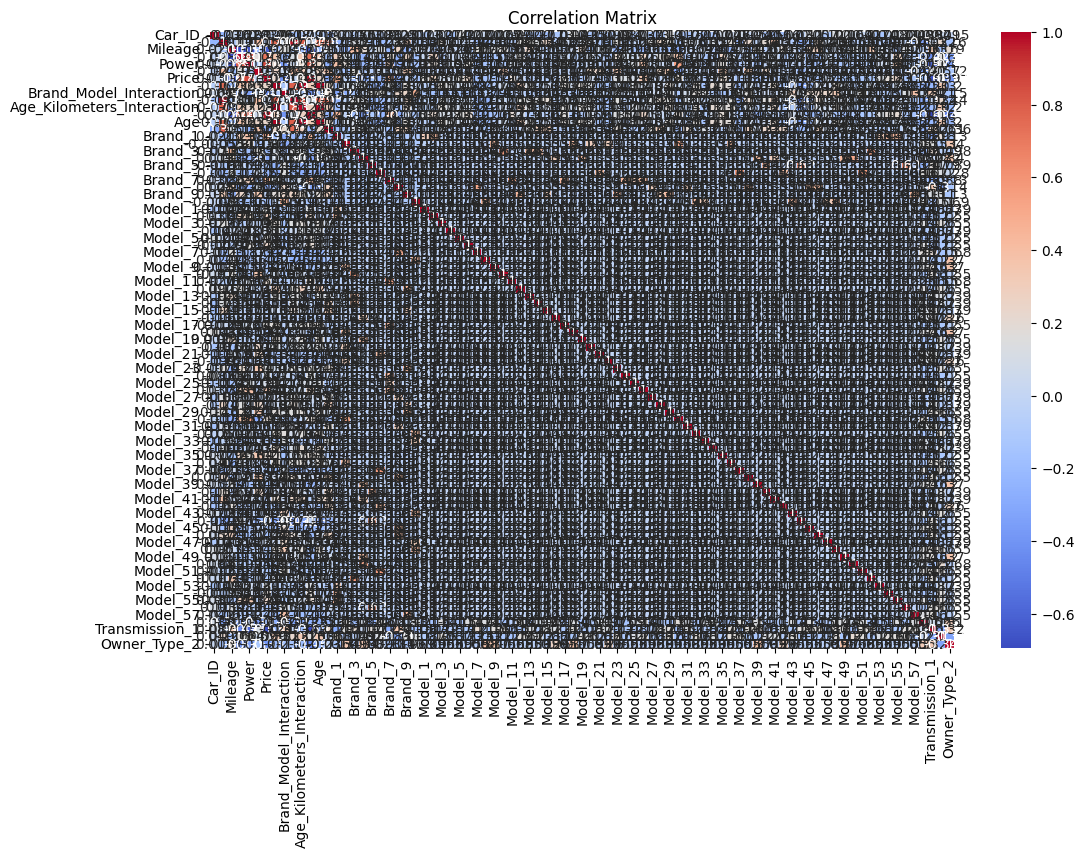

Price                      1.000000
Price_log                  0.973492
Power                      0.856620
Engine                     0.714465
Brand_1                    0.487649
                             ...   
Brand_4                   -0.303914
Owner_Type_2              -0.381290
Brand_Model_Interaction   -0.414859
Mileage                   -0.595252
Transmission_1            -0.676484
Name: Price, Length: 85, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

# Correlation with 'Price'
corr_with_price = correlation_matrix['Price'].sort_values(ascending=False)
print(corr_with_price)


Price_log      0.969694
Engine         0.008640
Power          0.007991
Km_per_Year    0.002885
Mileage        0.002301
                 ...   
Model_30       0.000000
Model_21       0.000000
Model_28       0.000000
Model_27       0.000000
Model_20       0.000000
Length: 84, dtype: float64


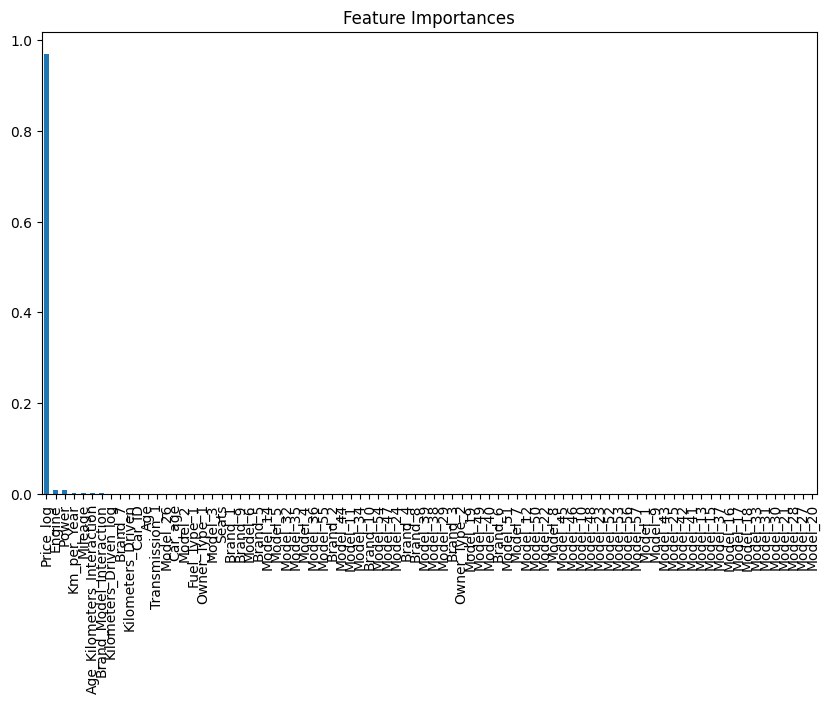

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Separate features and target variable
X = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Train the model using all features
all_features_model = RandomForestRegressor(n_estimators=100, random_state=42)
all_features_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_all = all_features_model.predict(X_test)
mse_all = mean_squared_error(y_test, y_pred_all)
r2_all = r2_score(y_test, y_pred_all)

print(f'Model with All Features - MSE: {mse_all}, R²: {r2_all}')

Model with All Features - MSE: 7475287500.0, R²: 0.9908598306535428


In [ ]:
# Select the top N important features (e.g., top 10)
important_features = feature_importances.index[:10]  # Adjust N as per your analysis
X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Train the model using important features only
important_features_model = RandomForestRegressor(n_estimators=100, random_state=42)
important_features_model.fit(X_train_important, y_train)

# Predictions and evaluation
y_pred_important = important_features_model.predict(X_test_important)
mse_important = mean_squared_error(y_test, y_pred_important)
r2_important = r2_score(y_test, y_pred_important)

print(f'Model with Important Features - MSE: {mse_important}, R²: {r2_important}')


Model with Important Features - MSE: 8123700000.0, R²: 0.9900670049520083


In [ ]:
# exp8
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Model with All Features
y_pred_all = all_features_model.predict(X_test)
mse_all = mean_squared_error(y_test, y_pred_all)
rmse_all = np.sqrt(mse_all)
r2_all = r2_score(y_test, y_pred_all)

# Model with Important Features
y_pred_important = important_features_model.predict(X_test_important)
mse_important = mean_squared_error(y_test, y_pred_important)
rmse_important = np.sqrt(mse_important)
r2_important = r2_score(y_test, y_pred_important)

# Display results
print(f'Model with All Features - MSE: {mse_all}, RMSE: {rmse_all}, R²: {r2_all}')
print(f'Model with Important Features - MSE: {mse_important}, RMSE: {rmse_important}, R²: {r2_important}')


Model with All Features - MSE: 7475287500.0, RMSE: 86459.74496839555, R²: 0.9908598306535428
Model with Important Features - MSE: 8123700000.0, RMSE: 90131.57049558162, R²: 0.9900670049520083


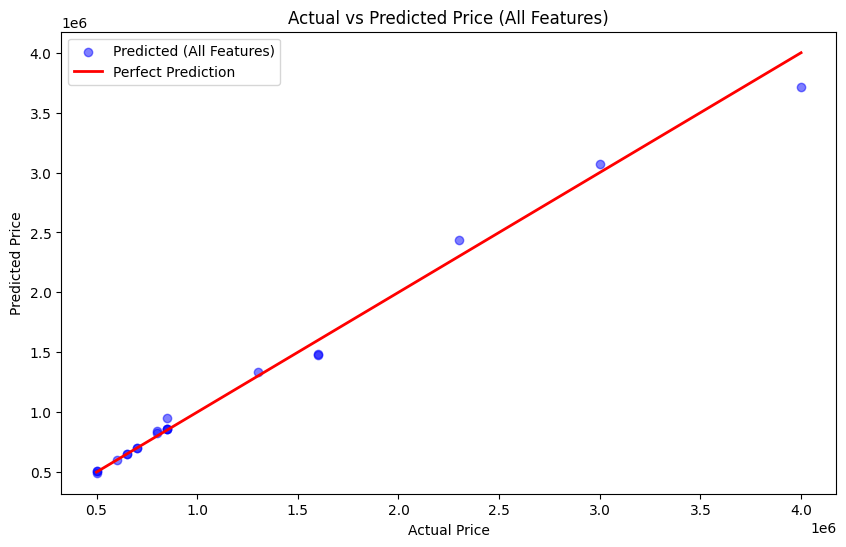

In [ ]:
# exp9
import matplotlib.pyplot as plt

# Scatter plot for Model with All Features
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_all, color='blue', alpha=0.5, label='Predicted (All Features)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Price (All Features)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

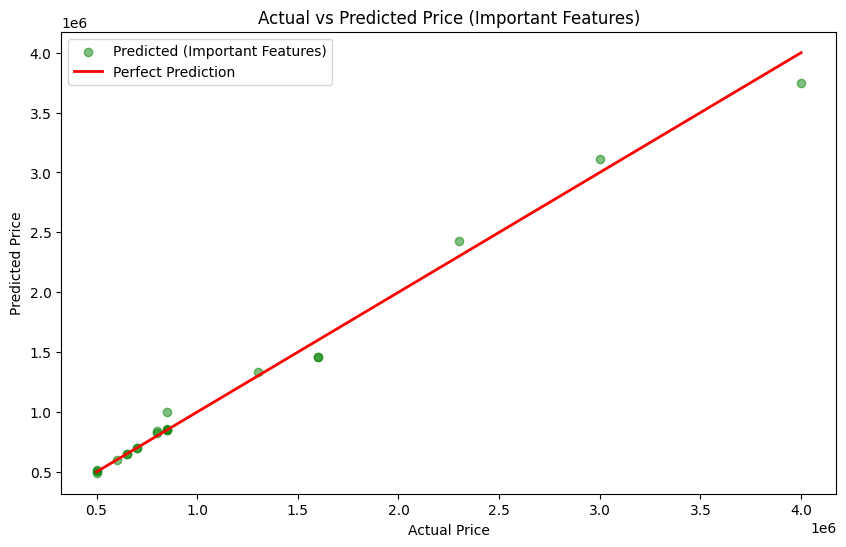

In [ ]:
# Scatter plot for Model with Important Features
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_important, color='green', alpha=0.5, label='Predicted (Important Features)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Price (Important Features)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()


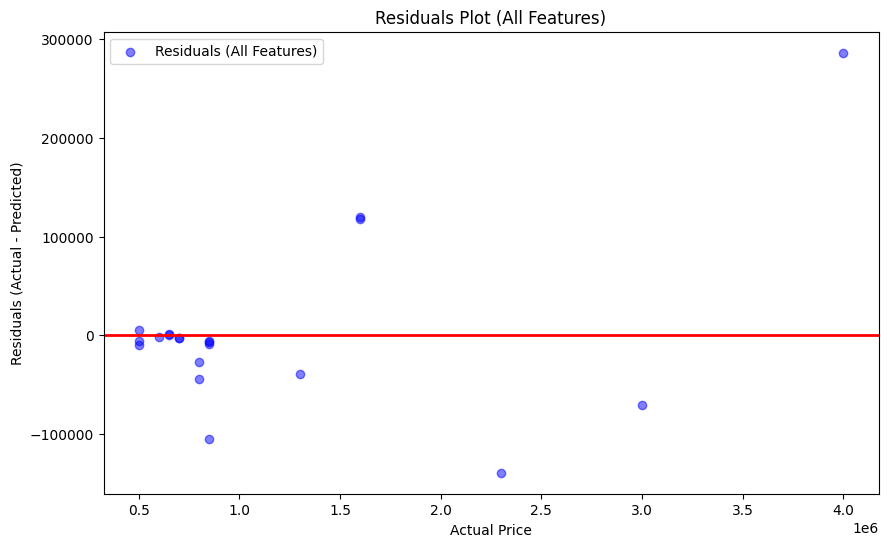

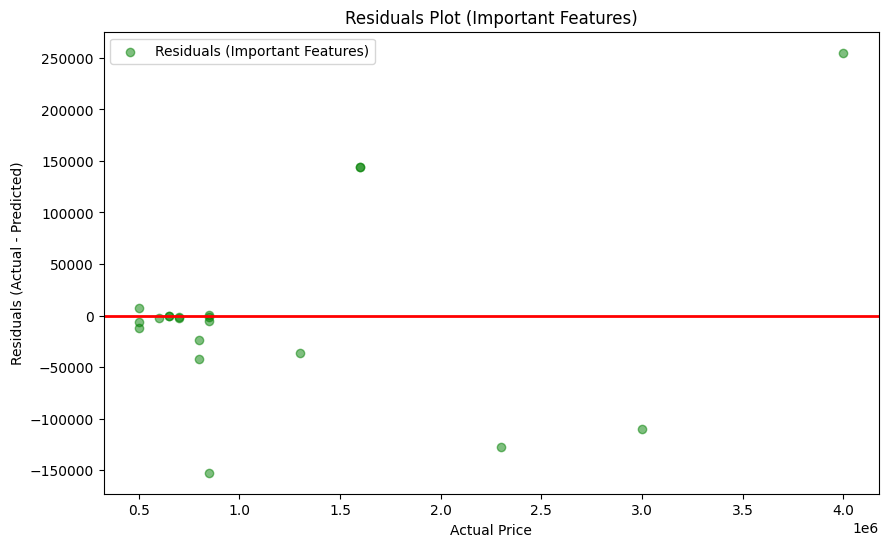

In [ ]:
# Residual plot for Model with All Features
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test - y_pred_all, color='blue', alpha=0.5, label='Residuals (All Features)')
plt.axhline(0, color='red', lw=2)
plt.title('Residuals Plot (All Features)')
plt.xlabel('Actual Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.show()

# Residual plot for Model with Important Features
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test - y_pred_important, color='green', alpha=0.5, label='Residuals (Important Features)')
plt.axhline(0, color='red', lw=2)
plt.title('Residuals Plot (Important Features)')
plt.xlabel('Actual Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()
plt.show()